In [1]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)



In [4]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [6]:
y_pred_test

array([2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2,
       2])

In [7]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

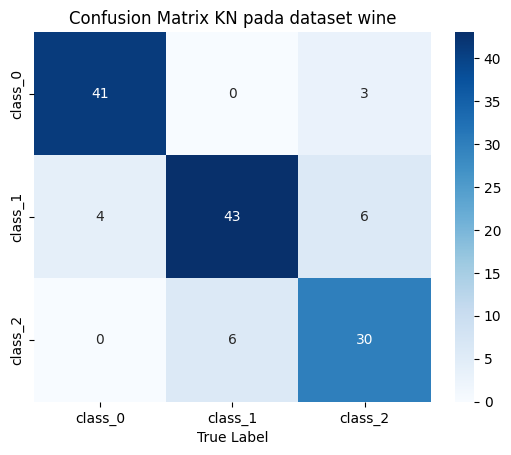

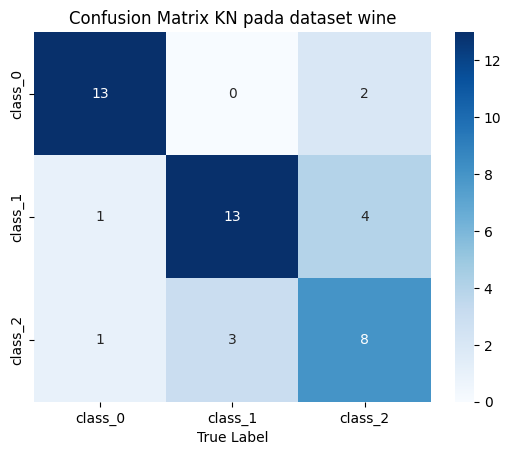

              precision    recall  f1-score   support

     class_0       0.91      0.93      0.92        44
     class_1       0.88      0.81      0.84        53
     class_2       0.77      0.83      0.80        36

    accuracy                           0.86       133
   macro avg       0.85      0.86      0.85       133
weighted avg       0.86      0.86      0.86       133

              precision    recall  f1-score   support

     class_0       0.87      0.87      0.87        15
     class_1       0.81      0.72      0.76        18
     class_2       0.57      0.67      0.62        12

    accuracy                           0.76        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.77      0.76      0.76        45



In [8]:
sns.heatmap(cm_train, annot=True, cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix KN pada dataset wine")
plt.show()

sns.heatmap(cm_test, annot=True, cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix KN pada dataset wine")
plt.show()

print(classification_report(y_train, y_pred_train, target_names=wine.target_names))
print(classification_report(y_test, y_pred_test, target_names=wine.target_names))

